<a href="https://colab.research.google.com/github/TatianaO8/AI/blob/master/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 3

## Problem 1
Generates random data for logisitic regression with two features, x_1 and x_2. 

Returns the array data of shape (m, 2) and the array labels of shape (m, 1).

### Get random data

In [0]:
import numpy as np
from random import seed
from random import random

def get_random_data(w, b, mu, sigma, m):
  seed(1)

  data = np.zeros((m, 2))
  labels = np.zeros((m,1))

  for i in range(m):
    # generate uniformly at random in [0,1)
    x_1 = np.random.default_rng().uniform(0,1)

    # n = noise, chosen according to the normal distribution
    n = np.random.default_rng().normal(mu, sigma)

    c = np.random.randint(0,2)
    
    x_2 = w * x_1 + b + (-1)**c * n
    data[i] = [x_1,x_2]
    labels[i] = c

  x = np.linspace(0, 1, 1000)
  y = w * x + b

  return data, labels, x, y

### Display the random data

Blue dots: label=1

Red dots: label = 0

In [0]:
import matplotlib.pyplot as plt

def display_random_data(labels, data, x, y):
  X_1_blue = []
  X_2_blue = []
  X_1_red = []
  X_2_red = []

  for i in range(len(data)):
    c = labels[i]
    if(c==0):
      X_1_blue.append(data[i,0])
      X_2_blue.append(data[i,1])
    else:
      X_1_red.append(data[i,0])
      X_2_red.append(data[i,1])
  
  plt.plot(X_1_blue, X_2_blue, "b.")
  plt.plot(X_1_red, X_2_red, "r.")
  plt.xlabel("$X_1$", fontsize=18)
  plt.ylabel("$X_2$", rotation=0, fontsize=18)
  plt.plot(x,y)
  
  
  plt.show()




### Experiment with different values of mu and sigma

m=1000


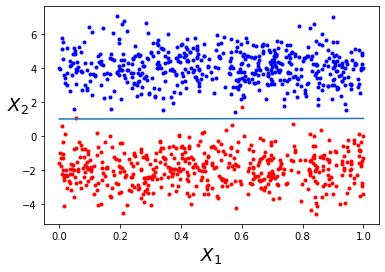

m= 1000


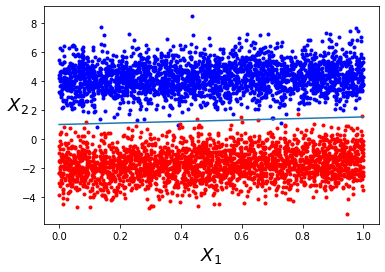

mu is larger


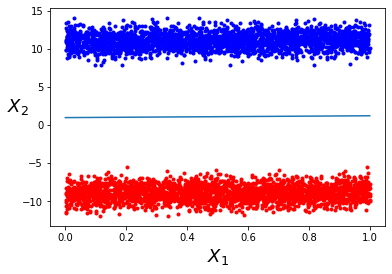

mu is larger and sigma is larger


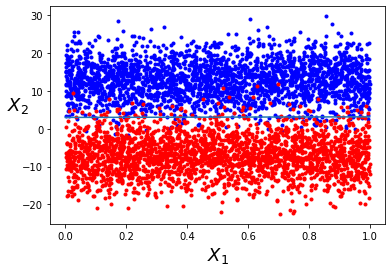

In [181]:
# m = 1000
print("m=1000")
initial_weight = np.random.default_rng().uniform(0,1)
data, labels, x, y = get_random_data(initial_weight, 1, 3, 1, 1000)
display_random_data(labels, data, x, y)

# m = 10000
print("m= 1000")
initial_weight = np.random.default_rng().uniform(0,1)
data, labels, x, y = get_random_data(initial_weight, 1, 3, 1, 5000)
display_random_data(labels, data, x, y)

#Bigger mu -> should be farther apart from each other
print("mu is larger")
initial_weight = np.random.default_rng().uniform(0,1)
data, labels, x, y = get_random_data(initial_weight, 1, 10, 1, 5000)
display_random_data(labels, data, x, y)

#Bigger sigma -> more points on the wrong side
print("mu is larger and sigma is larger")
initial_weight = np.random.default_rng().uniform(0,5)
initial_b = 3
data, labels, x, y = get_random_data(initial_weight, initial_b, 10, 5, 5000)
display_random_data(labels, data, x, y)


### Split the data/labels into a training set (80%) and a test set (20%)

In [0]:
split_index = int(len(data) * .8)
data_training, data_test = data[:split_index], data[split_index:]
labels_training, labels_test = labels[:split_index], labels[split_index:]

## Problem 2

Use Keras to implement logistic regression with two features and train it with the data generated in Problem 1

In [0]:
%tensorflow_version 2.x
import tensorflow as tf

### Set up logistic regression model

In [0]:
def build_and_compile_model():
    # build model
    model = tf.keras.models.Sequential()

    layer = tf.keras.layers.Dense(1, activation='sigmoid', input_shape=(2,))
    model.add(layer)

    weights = layer.get_weights()

    # compile model
    model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
                loss='binary_crossentropy',
                metrics=['accuracy'])
    
    return model, weights

### Train Model

In [185]:
model , weights = build_and_compile_model()

model.fit(data_training, labels_training, epochs=10, batch_size=512)


Epoch 1/10
8/8 [==============================] - 0s 2ms/step - loss: 12.1176 - accuracy: 0.0422
Epoch 2/10
8/8 [==============================] - 0s 1ms/step - loss: 11.9950 - accuracy: 0.0420
Epoch 3/10
8/8 [==============================] - 0s 1ms/step - loss: 11.8922 - accuracy: 0.0415
Epoch 4/10
8/8 [==============================] - 0s 1ms/step - loss: 11.8165 - accuracy: 0.0415
Epoch 5/10
8/8 [==============================] - 0s 2ms/step - loss: 11.7462 - accuracy: 0.0415
Epoch 6/10
8/8 [==============================] - 0s 1ms/step - loss: 11.6492 - accuracy: 0.0415
Epoch 7/10
8/8 [==============================] - 0s 1ms/step - loss: 11.5804 - accuracy: 0.0415
Epoch 8/10
8/8 [==============================] - 0s 1ms/step - loss: 11.4928 - accuracy: 0.0415
Epoch 9/10
8/8 [==============================] - 0s 1ms/step - loss: 11.4041 - accuracy: 0.0415
Epoch 10/10
8/8 [==============================] - 0s 1ms/step - loss: 11.3293 - accuracy: 0.0417


In [186]:
results = model.evaluate(data_test, labels_test)
results

32/32 [==============================] - 0s 1ms/step - loss: 11.3571 - accuracy: 0.0340


[11.35706901550293, 0.03400000184774399]

### Analyze predictions

In [0]:
predictions = model.predict(data_test)

### Display data with true line and seperate line

The seperation line is generated using the weights generated when training.
The result comes out to x_2 = ((-1 * weight_1 * x_1) - b)/weight_2 .
This comes from x_2 * weight_2 + x_1 * weight_1 = 0 where we try to put it in line form. Also, 0 comes fromes the fact that at z = 0, the neural network is maximally uncertain. sigmoid(z=0) =.5

In [0]:
import matplotlib.patches as mpatches

def display_random_data_with_lines(labels, data, weights, b, initial_weight, initial_b):

  fig= plt.figure(figsize=(10,10))

  X_1_blue = []
  X_2_blue = []
  X_1_red = []
  X_2_red = []

  weight_1 = weights[0]
  weight_2 = weights[1]

  for i in range(len(data)):
    c = labels[i]

    if(c==0):
      X_1_blue.append(data[i,0])
      X_2_blue.append(data[i,1])
    else:
      X_1_red.append(data[i,0])
      X_2_red.append(data[i,1])
  
  plt.plot(X_1_blue, X_2_blue, "b.")
  plt.plot(X_1_red, X_2_red, "r.")
  plt.xlabel("$X_1$", fontsize=18)
  plt.ylabel("$X_2$", rotation=0, fontsize=18)

  # Seperation Line
  x_1 = np.linspace(0, 1, 100)
  x_2 = ((-1 * weight_1 * x_1) - b)/weight_2 
  plt.plot(x_1, x_2, '-k')

  # True Line
  x = np.linspace(0, 1, 100)
  x2 = initial_weight * x + initial_b
  plt.plot(x, x2, '-g')

  green_line = mpatches.Patch(color='green', label='True line')
  black_line = mpatches.Patch(color='black', label='Seperation line')
  plt.legend(handles=[green_line, black_line])

  #plt.show()



### Heat map


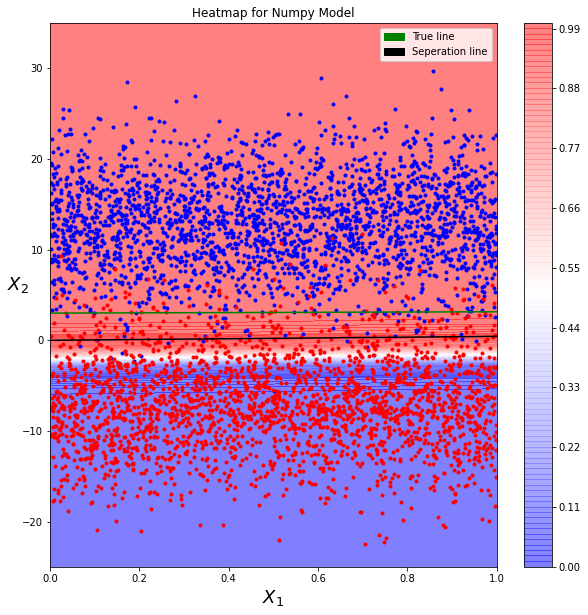

In [189]:
display_random_data_with_lines(labels, data, weights[0], weights[1], initial_weight, initial_b)
X_1r = np.linspace(0, 1)
X_2r = np.linspace(-25, 35)
X_1, X_2 = np.meshgrid(X_1r, X_2r)

z = weights[0][0] * X_1 + weights[0][1] * X_2 + b
p = 1.0 / (1.0 + np.exp(np.negative(z)))
plt.contourf(X_1, X_2, p, 100, cmap='bwr', alpha=0.5, zorder=-1)
plt.colorbar()
plt.title('Heatmap for Numpy Model')
plt.show()
plt.show()

## Problem 3
Implement a logistic regression model from scratch and train it with the data generated in Problem 1

binary cross entropy loss on test set: 5.653250041425067
accuracy on test set: 0.975


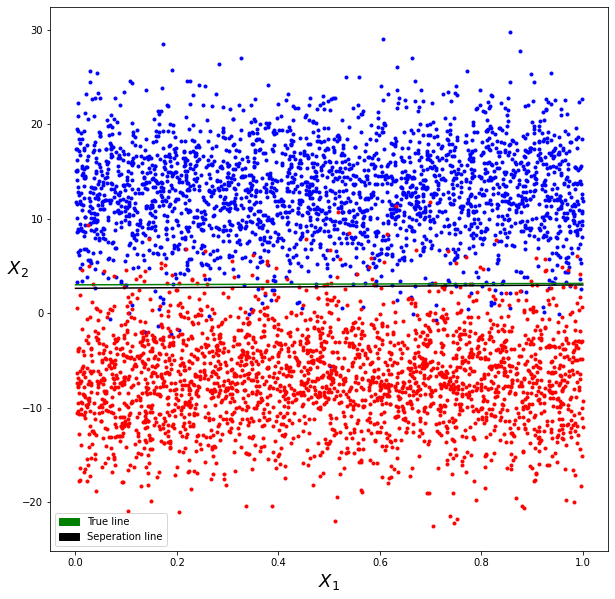

In [190]:
np.random.seed(42)

#Initial value for weights and bias 
weights = np.random.randn(2) 
b = np.zeros(1)

# number of epochs
epochs = 20
# learning rate
lr = 0.01

X = data
m = len(X)
y = labels

import math
def sigmoidFunction(z):
  return 1/(1 + math.exp(-z))


for epoch in range(epochs):
  shuffled_indices = np.random.permutation(m)

  for i in range(m):
    z = X[i].dot(weights) + b
    a = sigmoidFunction(z)
    gradient_w = (a - y[i]) * X[i]
    gradient_b = (a-y[i])   
    weights = weights - lr * gradient_w
    b = b - lr * gradient_b

display_random_data_with_lines(labels, data, weights, b, initial_weight, initial_b)

#compute the binary cross entropy and accuracy on the test set
binary_cross_entropy_loss = 0
correct_count = 0

for i in range(len(data_test)):
  a = sigmoidFunction(data_test[i].dot(weights) + b)
  binary_cross_entropy_loss += -1*labels_test[i]*math.log(a,2)- (1-labels_test[i])*math.log(a,2)

  if (a < .5 and labels_test[i] == 0) or (a >= .5 and labels_test[i] == 1):
    correct_count += 1

print("binary cross entropy loss on test set: " + str(binary_cross_entropy_loss[0] / len(data_test)))
print("accuracy on test set: " + str(correct_count / len(data_test)))
  

#display_random_data_with_lines()










### Heat map

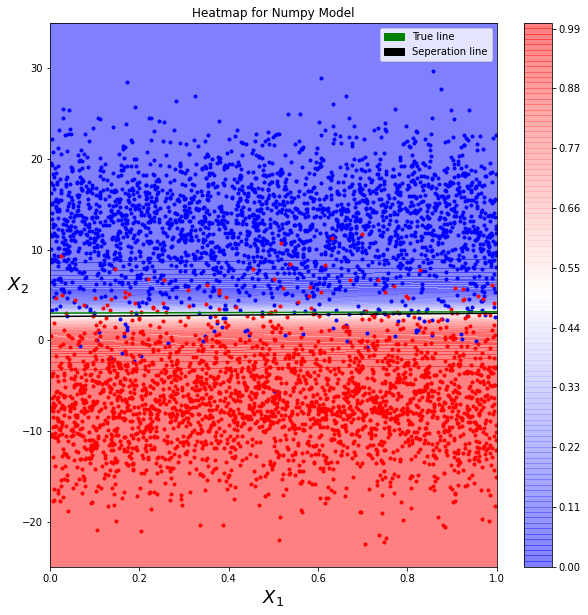

In [191]:
display_random_data_with_lines(labels, data, weights, b, initial_weight, initial_b)
X_1r = np.linspace(0, 1)
X_2r = np.linspace(-25, 35)
X_1, X_2 = np.meshgrid(X_1r, X_2r)
z = weights[0] * X_1 + weights[1] * X_2 + b
p = 1.0 / (1.0 + np.exp(np.negative(z)))
plt.contourf(X_1, X_2, p, 100, cmap='bwr', alpha=0.5, zorder=-1)
plt.colorbar()
plt.title('Heatmap for Numpy Model')
plt.show()